In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 523us/sample - loss: 0.7733 - accuracy: 0.5160 - val_loss: 0.7138 - val_accuracy: 0.4980
Epoch 2/100
2500/2500 [==============================] - 0s 105us/sample - loss: 0.6969 - accuracy: 0.5196 - val_loss: 0.6989 - val_accuracy: 0.4984
Epoch 3/100
2500/2500 [==============================] - 0s 105us/sample - loss: 0.6948 - accuracy: 0.5036 - val_loss: 0.6989 - val_accuracy: 0.4896
Epoch 4/100
2500/2500 [==============================] - 0s 106us/sample - loss: 0.6939 - accuracy: 0.5220 - val_loss: 0.6968 - val_accuracy: 0.4996
Epoch 5/100
2500/2500 [==============================] - 0s 105us/sample - loss: 0.6934 - accuracy: 0.5196 - val_loss: 0.6993 - val_accuracy: 0.4844
Epoch 6/100
2500/2500 [==============================] - 0s 104us/sample - loss: 0.6938 - accuracy: 0.5224 - val_loss: 0.6971 - val_accuracy: 0.5048
Epoch 7/100
2500/2500 [==============================] - 0

2500/2500 [==============================] - 0s 108us/sample - loss: 0.6934 - accuracy: 0.5120 - val_loss: 0.6978 - val_accuracy: 0.4932
Epoch 56/100
2500/2500 [==============================] - 0s 137us/sample - loss: 0.6930 - accuracy: 0.5168 - val_loss: 0.6981 - val_accuracy: 0.5028
Epoch 57/100
2500/2500 [==============================] - 0s 123us/sample - loss: 0.6946 - accuracy: 0.5152 - val_loss: 0.6965 - val_accuracy: 0.4944
Epoch 58/100
2500/2500 [==============================] - 0s 109us/sample - loss: 0.6939 - accuracy: 0.5072 - val_loss: 0.6959 - val_accuracy: 0.4920
Epoch 59/100
2500/2500 [==============================] - 0s 106us/sample - loss: 0.6940 - accuracy: 0.5124 - val_loss: 0.6969 - val_accuracy: 0.4948
Epoch 60/100
2500/2500 [==============================] - 0s 106us/sample - loss: 0.6939 - accuracy: 0.5152 - val_loss: 0.6980 - val_accuracy: 0.5028
Epoch 61/100
2500/2500 [==============================] - 0s 105us/sample - loss: 0.6943 - accuracy: 0.5228 - val

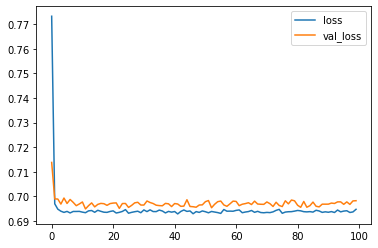

In [5]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

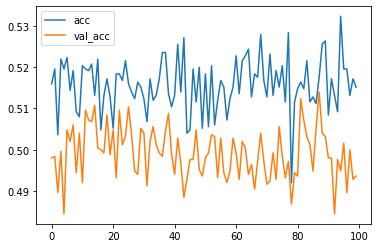

In [6]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [7]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [8]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6954 - accuracy: 0.5248 - val_loss: 0.6911 - val_accuracy: 0.5400
Epoch 2/200
2500/2500 [==============================] - 1s 347us/sample - loss: 0.6819 - accuracy: 0.5792 - val_loss: 0.6689 - val_accuracy: 0.6064
Epoch 3/200
2500/2500 [==============================] - 1s 376us/sample - loss: 0.6243 - accuracy: 0.7184 - val_loss: 0.5655 - val_accuracy: 0.7760
Epoch 4/200
2500/2500 [==============================] - 1s 389us/sample - loss: 0.4719 - accuracy: 0.8532 - val_loss: 0.3987 - val_accuracy: 0.8860
Epoch 5/200
2500/2500 [==============================] - 1s 349us/sample - loss: 0.3420 - accuracy: 0.8940 - val_loss: 0.3074 - val_accuracy: 0.9036
Epoch 6/200
2500/2500 [==============================] - 1s 357us/sample - loss: 0.2754 - accuracy: 0.9092 - val_loss: 0.2656 - val_accuracy: 0.9136
Epoch 7/200
2500/2500 [==============================] - 1s 

2500/2500 [==============================] - 1s 358us/sample - loss: 0.0538 - accuracy: 0.9868 - val_loss: 0.0660 - val_accuracy: 0.9812
Epoch 56/200
2500/2500 [==============================] - 1s 360us/sample - loss: 0.0526 - accuracy: 0.9876 - val_loss: 0.0644 - val_accuracy: 0.9764
Epoch 57/200
2500/2500 [==============================] - 1s 378us/sample - loss: 0.0548 - accuracy: 0.9824 - val_loss: 0.0634 - val_accuracy: 0.9820
Epoch 58/200
2500/2500 [==============================] - 1s 383us/sample - loss: 0.0517 - accuracy: 0.9856 - val_loss: 0.0647 - val_accuracy: 0.9772
Epoch 59/200
2500/2500 [==============================] - 1s 384us/sample - loss: 0.0530 - accuracy: 0.9828 - val_loss: 0.0626 - val_accuracy: 0.9808
Epoch 60/200
2500/2500 [==============================] - 1s 406us/sample - loss: 0.0510 - accuracy: 0.9848 - val_loss: 0.0613 - val_accuracy: 0.9800
Epoch 61/200
2500/2500 [==============================] - 1s 400us/sample - loss: 0.0503 - accuracy: 0.9856 - val

2500/2500 [==============================] - 1s 347us/sample - loss: 0.0364 - accuracy: 0.9892 - val_loss: 0.0536 - val_accuracy: 0.9824
Epoch 110/200
2500/2500 [==============================] - 1s 346us/sample - loss: 0.0360 - accuracy: 0.9864 - val_loss: 0.0556 - val_accuracy: 0.9764
Epoch 111/200
2500/2500 [==============================] - 1s 348us/sample - loss: 0.0360 - accuracy: 0.9896 - val_loss: 0.0542 - val_accuracy: 0.9772
Epoch 112/200
2500/2500 [==============================] - 1s 349us/sample - loss: 0.0340 - accuracy: 0.9912 - val_loss: 0.0525 - val_accuracy: 0.9808
Epoch 113/200
2500/2500 [==============================] - 1s 352us/sample - loss: 0.0397 - accuracy: 0.9860 - val_loss: 0.0564 - val_accuracy: 0.9780
Epoch 114/200
2500/2500 [==============================] - 1s 351us/sample - loss: 0.0411 - accuracy: 0.9832 - val_loss: 0.0569 - val_accuracy: 0.9744
Epoch 115/200
2500/2500 [==============================] - 1s 356us/sample - loss: 0.0400 - accuracy: 0.9864

2500/2500 [==============================] - 1s 346us/sample - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.0457 - val_accuracy: 0.9860
Epoch 164/200
2500/2500 [==============================] - 1s 350us/sample - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0503 - val_accuracy: 0.9804
Epoch 165/200
2500/2500 [==============================] - 1s 345us/sample - loss: 0.0336 - accuracy: 0.9880 - val_loss: 0.0629 - val_accuracy: 0.9680
Epoch 166/200
2500/2500 [==============================] - 1s 350us/sample - loss: 0.0351 - accuracy: 0.9876 - val_loss: 0.0592 - val_accuracy: 0.9804
Epoch 167/200
2500/2500 [==============================] - 1s 348us/sample - loss: 0.0330 - accuracy: 0.9904 - val_loss: 0.0550 - val_accuracy: 0.9780
Epoch 168/200
2500/2500 [==============================] - 1s 363us/sample - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.0532 - val_accuracy: 0.9756
Epoch 169/200
2500/2500 [==============================] - 1s 380us/sample - loss: 0.0294 - accuracy: 0.9900

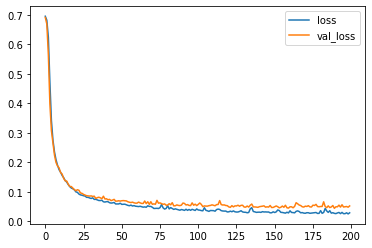

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

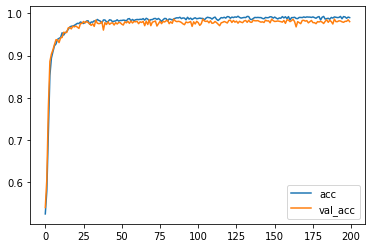

In [10]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [12]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.7005 - accuracy: 0.4944 - val_loss: 0.6933 - val_accuracy: 0.5168
Epoch 2/200
2500/2500 [==============================] - 1s 412us/sample - loss: 0.6942 - accuracy: 0.5268 - val_loss: 0.6920 - val_accuracy: 0.5244
Epoch 3/200
2500/2500 [==============================] - 1s 364us/sample - loss: 0.6949 - accuracy: 0.5036 - val_loss: 0.6919 - val_accuracy: 0.5216
Epoch 4/200
2500/2500 [==============================] - 1s 374us/sample - loss: 0.6937 - accuracy: 0.5224 - val_loss: 0.6923 - val_accuracy: 0.5076
Epoch 5/200
2500/2500 [==============================] - 1s 341us/sample - loss: 0.6950 - accuracy: 0.5196 - val_loss: 0.6912 - val_accuracy: 0.5336
Epoch 6/200
2500/2500 [==============================] - 1s 341us/sample - loss: 0.6922 - accuracy: 0.5320 - val_loss: 0.6978 - val_accuracy: 0.4716
Epoch 7/200
2500/2500 [==============================] - 1s 

2500/2500 [==============================] - 1s 375us/sample - loss: 0.6698 - accuracy: 0.6056 - val_loss: 0.6732 - val_accuracy: 0.5916
Epoch 56/200
2500/2500 [==============================] - 1s 385us/sample - loss: 0.6625 - accuracy: 0.6140 - val_loss: 0.6703 - val_accuracy: 0.5944
Epoch 57/200
2500/2500 [==============================] - 1s 359us/sample - loss: 0.6516 - accuracy: 0.6324 - val_loss: 0.6411 - val_accuracy: 0.6416
Epoch 58/200
2500/2500 [==============================] - 1s 357us/sample - loss: 0.6342 - accuracy: 0.6488 - val_loss: 0.6407 - val_accuracy: 0.6428
Epoch 59/200
2500/2500 [==============================] - 1s 358us/sample - loss: 0.6379 - accuracy: 0.6380 - val_loss: 0.6194 - val_accuracy: 0.6708
Epoch 60/200
2500/2500 [==============================] - 1s 344us/sample - loss: 0.6219 - accuracy: 0.6712 - val_loss: 0.6217 - val_accuracy: 0.6708
Epoch 61/200
2500/2500 [==============================] - 1s 350us/sample - loss: 0.6107 - accuracy: 0.6892 - val

2500/2500 [==============================] - 1s 350us/sample - loss: 0.1194 - accuracy: 0.9724 - val_loss: 0.1266 - val_accuracy: 0.9700
Epoch 110/200
2500/2500 [==============================] - 1s 408us/sample - loss: 0.1316 - accuracy: 0.9680 - val_loss: 0.2040 - val_accuracy: 0.9456
Epoch 111/200
2500/2500 [==============================] - 1s 363us/sample - loss: 0.1556 - accuracy: 0.9608 - val_loss: 0.1495 - val_accuracy: 0.9612
Epoch 112/200
2500/2500 [==============================] - 1s 356us/sample - loss: 0.1409 - accuracy: 0.9644 - val_loss: 0.1990 - val_accuracy: 0.9476
Epoch 113/200
2500/2500 [==============================] - 1s 354us/sample - loss: 0.1426 - accuracy: 0.9644 - val_loss: 0.1567 - val_accuracy: 0.9620
Epoch 114/200
2500/2500 [==============================] - 1s 358us/sample - loss: 0.2032 - accuracy: 0.9476 - val_loss: 0.2140 - val_accuracy: 0.9368
Epoch 115/200
2500/2500 [==============================] - 1s 362us/sample - loss: 0.1803 - accuracy: 0.9528

2500/2500 [==============================] - 1s 353us/sample - loss: 0.3542 - accuracy: 0.8568 - val_loss: 0.3315 - val_accuracy: 0.8760
Epoch 164/200
2500/2500 [==============================] - 1s 354us/sample - loss: 0.3478 - accuracy: 0.8808 - val_loss: 0.3326 - val_accuracy: 0.8868
Epoch 165/200
2500/2500 [==============================] - 1s 348us/sample - loss: 0.3032 - accuracy: 0.8972 - val_loss: 0.2686 - val_accuracy: 0.9200
Epoch 166/200
2500/2500 [==============================] - 1s 345us/sample - loss: 0.2434 - accuracy: 0.9236 - val_loss: 0.1803 - val_accuracy: 0.9544
Epoch 167/200
2500/2500 [==============================] - 1s 345us/sample - loss: 0.2725 - accuracy: 0.9132 - val_loss: 0.3395 - val_accuracy: 0.8688
Epoch 168/200
2500/2500 [==============================] - 1s 353us/sample - loss: 0.2603 - accuracy: 0.9156 - val_loss: 0.1896 - val_accuracy: 0.9536
Epoch 169/200
2500/2500 [==============================] - 1s 367us/sample - loss: 0.1778 - accuracy: 0.9552

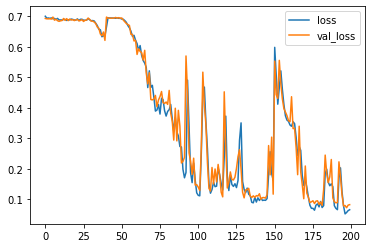

In [13]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

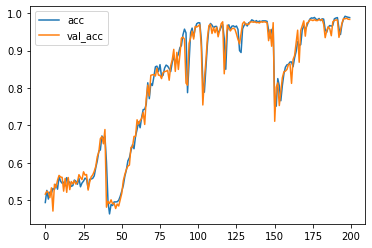

In [14]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 6s 2ms/sample - loss: 0.6963 - accuracy: 0.4908 - val_loss: 0.6940 - val_accuracy: 0.4980
Epoch 2/200
2500/2500 [==============================] - 2s 631us/sample - loss: 0.6940 - accuracy: 0.4920 - val_loss: 0.6934 - val_accuracy: 0.4832
Epoch 3/200
2500/2500 [==============================] - 1s 589us/sample - loss: 0.6945 - accuracy: 0.4864 - val_loss: 0.6934 - val_accuracy: 0.5028
Epoch 4/200
2500/2500 [==============================] - 1s 588us/sample - loss: 0.6938 - accuracy: 0.4936 - val_loss: 0.6936 - val_accuracy: 0.4948
Epoch 5/200
2500/2500 [==============================] - 1s 587us/sample - loss: 0.6935 - accuracy: 0.4916 - val_loss: 0.6939 - val_accuracy: 0.4956
Epoch 6/200
2500/2500 [==============================] - 1s 584us/sample - loss: 0.6906 - accuracy: 0.5020 - val_loss: 0.6908 - val_accuracy: 0.5060
Epoch 7/200
2500/2500 [==============================] - 2s 

2500/2500 [==============================] - 2s 653us/sample - loss: 0.0735 - accuracy: 0.9752 - val_loss: 0.1157 - val_accuracy: 0.9628
Epoch 56/200
2500/2500 [==============================] - 2s 633us/sample - loss: 0.0643 - accuracy: 0.9792 - val_loss: 0.1185 - val_accuracy: 0.9632
Epoch 57/200
2500/2500 [==============================] - 1s 599us/sample - loss: 0.0619 - accuracy: 0.9800 - val_loss: 0.1011 - val_accuracy: 0.9668
Epoch 58/200
2500/2500 [==============================] - 1s 593us/sample - loss: 0.0603 - accuracy: 0.9820 - val_loss: 0.1111 - val_accuracy: 0.9660
Epoch 59/200
2500/2500 [==============================] - 2s 634us/sample - loss: 0.0704 - accuracy: 0.9764 - val_loss: 0.1079 - val_accuracy: 0.9592
Epoch 60/200
2500/2500 [==============================] - 2s 650us/sample - loss: 0.0619 - accuracy: 0.9792 - val_loss: 0.0970 - val_accuracy: 0.9664
Epoch 61/200
2500/2500 [==============================] - 2s 653us/sample - loss: 0.0560 - accuracy: 0.9800 - val

2500/2500 [==============================] - 2s 625us/sample - loss: 0.0138 - accuracy: 0.9964 - val_loss: 0.0400 - val_accuracy: 0.9864
Epoch 110/200
2500/2500 [==============================] - 2s 606us/sample - loss: 0.0186 - accuracy: 0.9932 - val_loss: 0.0346 - val_accuracy: 0.9884
Epoch 111/200
2500/2500 [==============================] - 1s 597us/sample - loss: 0.0068 - accuracy: 0.9972 - val_loss: 0.0372 - val_accuracy: 0.9884
Epoch 112/200
2500/2500 [==============================] - 1s 596us/sample - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.0400 - val_accuracy: 0.9896
Epoch 113/200
2500/2500 [==============================] - 1s 594us/sample - loss: 0.0058 - accuracy: 0.9976 - val_loss: 0.0485 - val_accuracy: 0.9852
Epoch 114/200
2500/2500 [==============================] - 1s 594us/sample - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.0403 - val_accuracy: 0.9868
Epoch 115/200
2500/2500 [==============================] - 1s 578us/sample - loss: 0.0058 - accuracy: 0.9976

2500/2500 [==============================] - 1s 590us/sample - loss: 5.3700e-04 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 0.9920
Epoch 164/200
2500/2500 [==============================] - 1s 595us/sample - loss: 4.1819e-04 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 0.9928
Epoch 165/200
2500/2500 [==============================] - 1s 592us/sample - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0574 - val_accuracy: 0.9872
Epoch 166/200
2500/2500 [==============================] - 1s 592us/sample - loss: 0.0214 - accuracy: 0.9940 - val_loss: 0.0282 - val_accuracy: 0.9916
Epoch 167/200
2500/2500 [==============================] - 1s 582us/sample - loss: 0.0029 - accuracy: 0.9988 - val_loss: 0.0327 - val_accuracy: 0.9908
Epoch 168/200
2500/2500 [==============================] - 1s 597us/sample - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.0296 - val_accuracy: 0.9908
Epoch 169/200
2500/2500 [==============================] - 1s 599us/sample - loss: 0.0028 - accuracy

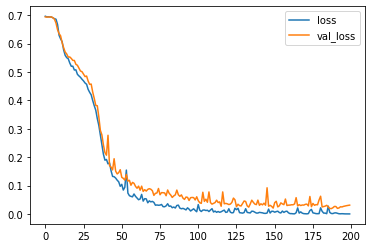

In [16]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

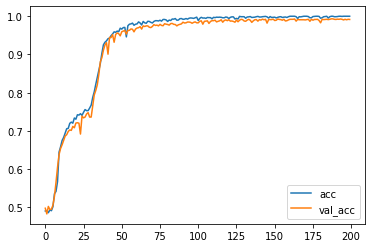

In [17]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [18]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [19]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.7023 - accuracy: 0.5036 - val_loss: 0.7011 - val_accuracy: 0.4976
Epoch 2/200
2500/2500 [==============================] - 1s 557us/sample - loss: 0.6936 - accuracy: 0.5172 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 3/200
2500/2500 [==============================] - 1s 561us/sample - loss: 0.6951 - accuracy: 0.5144 - val_loss: 0.6952 - val_accuracy: 0.5020
Epoch 4/200
2500/2500 [==============================] - 1s 566us/sample - loss: 0.6940 - accuracy: 0.5140 - val_loss: 0.6958 - val_accuracy: 0.5040
Epoch 5/200
2500/2500 [==============================] - 1s 566us/sample - loss: 0.6929 - accuracy: 0.5156 - val_loss: 0.6989 - val_accuracy: 0.4820
Epoch 6/200
2500/2500 [==============================] - 1s 565us/sample - loss: 0.6925 - accuracy: 0.5152 - val_loss: 0.6960 - val_accuracy: 0.4992
Epoch 7/200
2500/2500 [==============================] - 2s 

2500/2500 [==============================] - 1s 570us/sample - loss: 0.6923 - accuracy: 0.5276 - val_loss: 0.6987 - val_accuracy: 0.4984
Epoch 56/200
2500/2500 [==============================] - 1s 552us/sample - loss: 0.6924 - accuracy: 0.5272 - val_loss: 0.6976 - val_accuracy: 0.4984
Epoch 57/200
2500/2500 [==============================] - 1s 557us/sample - loss: 0.6915 - accuracy: 0.5324 - val_loss: 0.6972 - val_accuracy: 0.4960
Epoch 58/200
2500/2500 [==============================] - 1s 554us/sample - loss: 0.6910 - accuracy: 0.5280 - val_loss: 0.6973 - val_accuracy: 0.4888
Epoch 59/200
2500/2500 [==============================] - 1s 567us/sample - loss: 0.6912 - accuracy: 0.5224 - val_loss: 0.6977 - val_accuracy: 0.4952
Epoch 60/200
2500/2500 [==============================] - 1s 572us/sample - loss: 0.6919 - accuracy: 0.5204 - val_loss: 0.6956 - val_accuracy: 0.4976
Epoch 61/200
2500/2500 [==============================] - 1s 573us/sample - loss: 0.6940 - accuracy: 0.5160 - val

2500/2500 [==============================] - 1s 566us/sample - loss: 0.6929 - accuracy: 0.5096 - val_loss: 0.6970 - val_accuracy: 0.4976
Epoch 110/200
2500/2500 [==============================] - 1s 567us/sample - loss: 0.6953 - accuracy: 0.4992 - val_loss: 0.6948 - val_accuracy: 0.4968
Epoch 111/200
2500/2500 [==============================] - 1s 560us/sample - loss: 0.6959 - accuracy: 0.4880 - val_loss: 0.6943 - val_accuracy: 0.5036
Epoch 112/200
2500/2500 [==============================] - 1s 546us/sample - loss: 0.6936 - accuracy: 0.5124 - val_loss: 0.6946 - val_accuracy: 0.5032
Epoch 113/200
2500/2500 [==============================] - 2s 602us/sample - loss: 0.6937 - accuracy: 0.5156 - val_loss: 0.6947 - val_accuracy: 0.4996
Epoch 114/200
2500/2500 [==============================] - 1s 575us/sample - loss: 0.6921 - accuracy: 0.5112 - val_loss: 0.6984 - val_accuracy: 0.5152
Epoch 115/200
2500/2500 [==============================] - 1s 568us/sample - loss: 0.6959 - accuracy: 0.4928

2500/2500 [==============================] - 2s 614us/sample - loss: 0.6932 - accuracy: 0.5208 - val_loss: 0.6953 - val_accuracy: 0.4828
Epoch 164/200
2500/2500 [==============================] - 2s 618us/sample - loss: 0.6932 - accuracy: 0.5084 - val_loss: 0.6952 - val_accuracy: 0.4964
Epoch 165/200
2500/2500 [==============================] - 1s 590us/sample - loss: 0.6939 - accuracy: 0.4908 - val_loss: 0.6956 - val_accuracy: 0.4900
Epoch 166/200
2500/2500 [==============================] - 1s 560us/sample - loss: 0.6932 - accuracy: 0.5088 - val_loss: 0.6966 - val_accuracy: 0.4916
Epoch 167/200
2500/2500 [==============================] - 1s 547us/sample - loss: 0.6931 - accuracy: 0.5156 - val_loss: 0.6954 - val_accuracy: 0.4836
Epoch 168/200
2500/2500 [==============================] - 1s 545us/sample - loss: 0.6930 - accuracy: 0.5132 - val_loss: 0.6950 - val_accuracy: 0.5064
Epoch 169/200
2500/2500 [==============================] - 1s 543us/sample - loss: 0.6926 - accuracy: 0.5200

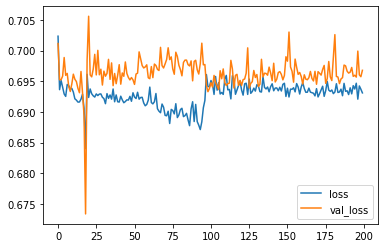

In [20]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

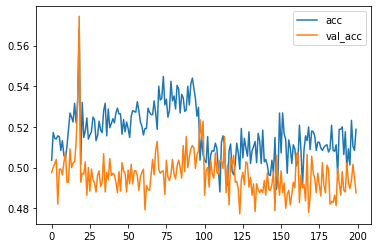

In [21]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [22]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.6938 - accuracy: 0.5068 - val_loss: 0.6951 - val_accuracy: 0.5040
Epoch 2/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6936 - accuracy: 0.5092 - val_loss: 0.6949 - val_accuracy: 0.4972
Epoch 3/200
2500/2500 [==============================] - 2s 985us/sample - loss: 0.6926 - accuracy: 0.5120 - val_loss: 0.6948 - val_accuracy: 0.5032
Epoch 4/200
2500/2500 [==============================] - 2s 998us/sample - loss: 0.6931 - accuracy: 0.5176 - val_loss: 0.6946 - val_accuracy: 0.4968
Epoch 5/200
2500/2500 [==============================] - 2s 973us/sample - loss: 0.6926 - accuracy: 0.5236 - val_loss: 0.6949 - val_accuracy: 0.5012
Epoch 6/200
2500/2500 [==============================] - 2s 976us/sample - loss: 0.6927 - accuracy: 0.5104 - val_loss: 0.6949 - val_accuracy: 0.4976
Epoch 7/200
2500/2500 [==============================] - 2s 97

Epoch 56/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6888 - accuracy: 0.5428 - val_loss: 0.7010 - val_accuracy: 0.5036
Epoch 57/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6916 - accuracy: 0.5220 - val_loss: 0.6973 - val_accuracy: 0.4988
Epoch 58/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6897 - accuracy: 0.5344 - val_loss: 0.6961 - val_accuracy: 0.4984
Epoch 59/200
2500/2500 [==============================] - 2s 962us/sample - loss: 0.6889 - accuracy: 0.5252 - val_loss: 0.6955 - val_accuracy: 0.5064
Epoch 60/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6888 - accuracy: 0.5368 - val_loss: 0.6953 - val_accuracy: 0.5004
Epoch 61/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6882 - accuracy: 0.5464 - val_loss: 0.6974 - val_accuracy: 0.4936
Epoch 62/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6879 - accuracy: 0.5484 - va

Epoch 111/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6682 - accuracy: 0.5776 - val_loss: 0.7084 - val_accuracy: 0.5060
Epoch 112/200
2500/2500 [==============================] - 2s 953us/sample - loss: 0.6677 - accuracy: 0.5724 - val_loss: 0.7105 - val_accuracy: 0.5100
Epoch 113/200
2500/2500 [==============================] - 2s 940us/sample - loss: 0.6712 - accuracy: 0.5756 - val_loss: 0.7107 - val_accuracy: 0.5060
Epoch 114/200
2500/2500 [==============================] - 2s 938us/sample - loss: 0.6662 - accuracy: 0.5816 - val_loss: 0.7118 - val_accuracy: 0.5056
Epoch 115/200
2500/2500 [==============================] - 2s 917us/sample - loss: 0.6677 - accuracy: 0.5836 - val_loss: 0.7083 - val_accuracy: 0.5084
Epoch 116/200
2500/2500 [==============================] - 2s 945us/sample - loss: 0.6681 - accuracy: 0.5796 - val_loss: 0.7140 - val_accuracy: 0.5076
Epoch 117/200
2500/2500 [==============================] - 2s 945us/sample - loss: 0.6662 - accu

2500/2500 [==============================] - 2s 961us/sample - loss: 0.6592 - accuracy: 0.5856 - val_loss: 0.7235 - val_accuracy: 0.5148
Epoch 166/200
2500/2500 [==============================] - 2s 955us/sample - loss: 0.6554 - accuracy: 0.5892 - val_loss: 0.7162 - val_accuracy: 0.5168
Epoch 167/200
2500/2500 [==============================] - 2s 916us/sample - loss: 0.6564 - accuracy: 0.5856 - val_loss: 0.7219 - val_accuracy: 0.5204
Epoch 168/200
2500/2500 [==============================] - 2s 904us/sample - loss: 0.6553 - accuracy: 0.5832 - val_loss: 0.7263 - val_accuracy: 0.5136
Epoch 169/200
2500/2500 [==============================] - 2s 945us/sample - loss: 0.6580 - accuracy: 0.5908 - val_loss: 0.7202 - val_accuracy: 0.5256
Epoch 170/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6573 - accuracy: 0.5868 - val_loss: 0.7221 - val_accuracy: 0.5084
Epoch 171/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6560 - accuracy: 0.5848 - v

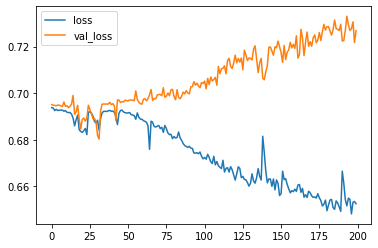

In [23]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

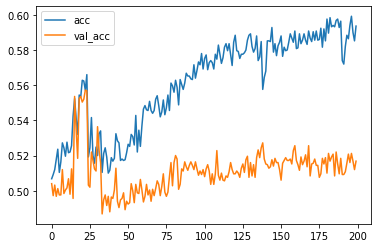

In [24]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [25]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.6952 - accuracy: 0.5060 - val_loss: 0.6949 - val_accuracy: 0.5020
Epoch 2/400
2500/2500 [==============================] - 2s 967us/sample - loss: 0.6937 - accuracy: 0.4964 - val_loss: 0.6951 - val_accuracy: 0.4952
Epoch 3/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6925 - accuracy: 0.5168 - val_loss: 0.6955 - val_accuracy: 0.4968
Epoch 4/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6929 - accuracy: 0.5140 - val_loss: 0.6950 - val_accuracy: 0.4932
Epoch 5/400
2500/2500 [==============================] - 2s 985us/sample - loss: 0.6929 - accuracy: 0.5060 - val_loss: 0.6943 - val_accuracy: 0.4996
Epoch 6/400
2500/2500 [==============================] - 2s 999us/sample - loss: 0.6925 - accuracy: 0.5224 - val_loss: 0.6944 - val_accuracy: 0.5036
Epoch 7/400
2500/2500 [==============================] - 3s 1ms/

Epoch 56/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6862 - accuracy: 0.5444 - val_loss: 0.7014 - val_accuracy: 0.5204
Epoch 57/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6843 - accuracy: 0.5584 - val_loss: 0.7029 - val_accuracy: 0.5024
Epoch 58/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6828 - accuracy: 0.5528 - val_loss: 0.7023 - val_accuracy: 0.5060
Epoch 59/400
2500/2500 [==============================] - 2s 991us/sample - loss: 0.6866 - accuracy: 0.5464 - val_loss: 0.7032 - val_accuracy: 0.5088
Epoch 60/400
2500/2500 [==============================] - 2s 998us/sample - loss: 0.6946 - accuracy: 0.5188 - val_loss: 0.6953 - val_accuracy: 0.5156
Epoch 61/400
2500/2500 [==============================] - 2s 980us/sample - loss: 0.6901 - accuracy: 0.5260 - val_loss: 0.6988 - val_accuracy: 0.5020
Epoch 62/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6905 - accuracy: 0.5236 

Epoch 111/400
2500/2500 [==============================] - 2s 987us/sample - loss: 0.6688 - accuracy: 0.5932 - val_loss: 0.6839 - val_accuracy: 0.5520
Epoch 112/400
2500/2500 [==============================] - 2s 987us/sample - loss: 0.6706 - accuracy: 0.5948 - val_loss: 0.6904 - val_accuracy: 0.5476
Epoch 113/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6702 - accuracy: 0.5996 - val_loss: 0.6843 - val_accuracy: 0.5588
Epoch 114/400
2500/2500 [==============================] - 2s 978us/sample - loss: 0.6707 - accuracy: 0.5872 - val_loss: 0.6802 - val_accuracy: 0.5568
Epoch 115/400
2500/2500 [==============================] - 2s 985us/sample - loss: 0.6708 - accuracy: 0.5816 - val_loss: 0.6844 - val_accuracy: 0.5584
Epoch 116/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6690 - accuracy: 0.5840 - val_loss: 0.6801 - val_accuracy: 0.5692
Epoch 117/400
2500/2500 [==============================] - 2s 993us/sample - loss: 0.6666 - accura

2500/2500 [==============================] - 2s 993us/sample - loss: 0.6918 - accuracy: 0.5188 - val_loss: 0.6968 - val_accuracy: 0.4944
Epoch 166/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6946 - accuracy: 0.5088 - val_loss: 0.6979 - val_accuracy: 0.4948
Epoch 167/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6944 - accuracy: 0.5084 - val_loss: 0.6955 - val_accuracy: 0.4884
Epoch 168/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6908 - accuracy: 0.5164 - val_loss: 0.6978 - val_accuracy: 0.5048
Epoch 169/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6946 - accuracy: 0.5128 - val_loss: 0.6951 - val_accuracy: 0.4924
Epoch 170/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6932 - accuracy: 0.5108 - val_loss: 0.6960 - val_accuracy: 0.4860
Epoch 171/400
2500/2500 [==============================] - 2s 998us/sample - loss: 0.6949 - accuracy: 0.4984 - val_los

Epoch 220/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6937 - val_accuracy: 0.5028
Epoch 221/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6938 - accuracy: 0.4948 - val_loss: 0.6930 - val_accuracy: 0.5152
Epoch 222/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6931 - accuracy: 0.5144 - val_loss: 0.6929 - val_accuracy: 0.5200
Epoch 223/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6938 - val_accuracy: 0.5060
Epoch 224/400
2500/2500 [==============================] - 2s 990us/sample - loss: 0.6932 - accuracy: 0.5176 - val_loss: 0.6957 - val_accuracy: 0.5060
Epoch 225/400
2500/2500 [==============================] - 2s 994us/sample - loss: 0.6929 - accuracy: 0.5120 - val_loss: 0.6940 - val_accuracy: 0.5076
Epoch 226/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6924 - accuracy: 0.

Epoch 275/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6891 - accuracy: 0.5288 - val_loss: 0.6987 - val_accuracy: 0.5020
Epoch 276/400
2500/2500 [==============================] - 2s 994us/sample - loss: 0.6906 - accuracy: 0.5236 - val_loss: 0.6947 - val_accuracy: 0.5044
Epoch 277/400
2500/2500 [==============================] - 2s 991us/sample - loss: 0.6893 - accuracy: 0.5292 - val_loss: 0.6960 - val_accuracy: 0.5084
Epoch 278/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6872 - accuracy: 0.5368 - val_loss: 0.6930 - val_accuracy: 0.5148
Epoch 279/400
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.6866 - accuracy: 0.5472 - val_loss: 0.6946 - val_accuracy: 0.5144
Epoch 280/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6896 - accuracy: 0.5312 - val_loss: 0.6950 - val_accuracy: 0.5120
Epoch 281/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6879 - accuracy: 0.

2500/2500 [==============================] - 2s 977us/sample - loss: 0.6688 - accuracy: 0.5788 - val_loss: 0.6810 - val_accuracy: 0.5304
Epoch 330/400
2500/2500 [==============================] - 2s 966us/sample - loss: 0.6854 - accuracy: 0.5660 - val_loss: 0.6999 - val_accuracy: 0.5472
Epoch 331/400
2500/2500 [==============================] - 2s 978us/sample - loss: 0.6801 - accuracy: 0.5588 - val_loss: 0.6811 - val_accuracy: 0.5568
Epoch 332/400
2500/2500 [==============================] - 2s 981us/sample - loss: 0.6709 - accuracy: 0.5672 - val_loss: 0.6777 - val_accuracy: 0.5428
Epoch 333/400
2500/2500 [==============================] - 2s 984us/sample - loss: 0.6664 - accuracy: 0.5796 - val_loss: 0.6746 - val_accuracy: 0.5596
Epoch 334/400
2500/2500 [==============================] - 2s 974us/sample - loss: 0.6724 - accuracy: 0.5648 - val_loss: 0.6723 - val_accuracy: 0.5664
Epoch 335/400
2500/2500 [==============================] - 2s 967us/sample - loss: 0.6631 - accuracy: 0.5780

2500/2500 [==============================] - 2s 981us/sample - loss: 0.5313 - accuracy: 0.6788 - val_loss: 0.5233 - val_accuracy: 0.6736
Epoch 384/400
2500/2500 [==============================] - 2s 971us/sample - loss: 0.5040 - accuracy: 0.6980 - val_loss: 0.5034 - val_accuracy: 0.6924
Epoch 385/400
2500/2500 [==============================] - 2s 965us/sample - loss: 0.4912 - accuracy: 0.6996 - val_loss: 0.5072 - val_accuracy: 0.6752
Epoch 386/400
2500/2500 [==============================] - 2s 978us/sample - loss: 0.4840 - accuracy: 0.7060 - val_loss: 0.4883 - val_accuracy: 0.6944
Epoch 387/400
2500/2500 [==============================] - 2s 985us/sample - loss: 0.4725 - accuracy: 0.7160 - val_loss: 0.4705 - val_accuracy: 0.7036
Epoch 388/400
2500/2500 [==============================] - 2s 982us/sample - loss: 0.4855 - accuracy: 0.6988 - val_loss: 0.4757 - val_accuracy: 0.6984
Epoch 389/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.4704 - accuracy: 0.7168 -

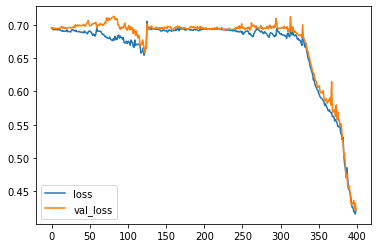

In [26]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

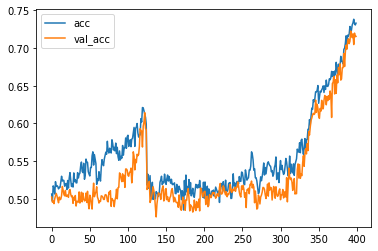

In [27]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [28]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 8s 3ms/sample - loss: 0.6954 - accuracy: 0.5040 - val_loss: 0.6934 - val_accuracy: 0.4988
Epoch 2/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6944 - accuracy: 0.4964 - val_loss: 0.6929 - val_accuracy: 0.5104
Epoch 3/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6933 - accuracy: 0.4960 - val_loss: 0.6926 - val_accuracy: 0.5136
Epoch 4/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6935 - accuracy: 0.5052 - val_loss: 0.6925 - val_accuracy: 0.5080
Epoch 5/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6932 - accuracy: 0.5136 - val_loss: 0.6921 - val_accuracy: 0.5192
Epoch 6/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6930 - accuracy: 0.5092 - val_loss: 0.6940 - val_accuracy: 0.4964
Epoch 7/400
2500/2500 [==============================] - 3s 1ms/sample

2500/2500 [==============================] - 5s 2ms/sample - loss: 0.5906 - accuracy: 0.6680 - val_loss: 0.8159 - val_accuracy: 0.4988
Epoch 57/400
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.6041 - accuracy: 0.6640 - val_loss: 0.8126 - val_accuracy: 0.4880
Epoch 58/400
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.5868 - accuracy: 0.6756 - val_loss: 0.8211 - val_accuracy: 0.4884
Epoch 59/400
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.6385 - accuracy: 0.6276 - val_loss: 0.7829 - val_accuracy: 0.4828
Epoch 60/400
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.5984 - accuracy: 0.6644 - val_loss: 0.8015 - val_accuracy: 0.4912
Epoch 61/400
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.5797 - accuracy: 0.6856 - val_loss: 0.8223 - val_accuracy: 0.5000
Epoch 62/400
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.5899 - accuracy: 0.6772 - val_loss: 0.8366 

2500/2500 [==============================] - 4s 2ms/sample - loss: 0.5543 - accuracy: 0.6988 - val_loss: 0.8674 - val_accuracy: 0.4828
Epoch 112/400
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6010 - accuracy: 0.6688 - val_loss: 0.8666 - val_accuracy: 0.4836
Epoch 113/400
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6865 - accuracy: 0.5892 - val_loss: 0.7878 - val_accuracy: 0.4828
Epoch 114/400
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6437 - accuracy: 0.6260 - val_loss: 0.7922 - val_accuracy: 0.4808
Epoch 115/400
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6180 - accuracy: 0.6552 - val_loss: 0.8014 - val_accuracy: 0.4736
Epoch 116/400
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.5941 - accuracy: 0.6756 - val_loss: 0.8035 - val_accuracy: 0.4912
Epoch 117/400
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.5821 - accuracy: 0.6872 - val_loss: 0

2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6749 - accuracy: 0.5656 - val_loss: 0.7245 - val_accuracy: 0.5052
Epoch 167/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6817 - accuracy: 0.5576 - val_loss: 0.7106 - val_accuracy: 0.5200
Epoch 168/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6846 - accuracy: 0.5500 - val_loss: 0.7073 - val_accuracy: 0.5128
Epoch 169/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6801 - accuracy: 0.5460 - val_loss: 0.7074 - val_accuracy: 0.4920
Epoch 170/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6818 - accuracy: 0.5532 - val_loss: 0.7069 - val_accuracy: 0.5068
Epoch 171/400
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6746 - accuracy: 0.5808 - val_loss: 0.7142 - val_accuracy: 0.4948
Epoch 172/400
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6693 - accuracy: 0.5836 - val_loss: 0

2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6606 - accuracy: 0.5852 - val_loss: 0.7184 - val_accuracy: 0.5028
Epoch 222/400
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6595 - accuracy: 0.5948 - val_loss: 0.7180 - val_accuracy: 0.5172
Epoch 223/400
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6608 - accuracy: 0.5804 - val_loss: 0.7275 - val_accuracy: 0.5032
Epoch 224/400
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6620 - accuracy: 0.5824 - val_loss: 0.7223 - val_accuracy: 0.5032
Epoch 225/400
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6752 - accuracy: 0.5668 - val_loss: 0.7186 - val_accuracy: 0.4984
Epoch 226/400
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6730 - accuracy: 0.5752 - val_loss: 0.7186 - val_accuracy: 0.4988
Epoch 227/400
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6676 - accuracy: 0.5820 - val_loss: 0

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()